In [2]:
import numpy as np

In [3]:
# (action, k2-k1, l1, l2, m1, m2) : prob
probabilities = {
    ('S',  0, 0, 0, 0, 1) : 1,
    ('S',  0, 1, 1, 0, 1) : 1,

    ('N',  3, 0, 1, 1, 0) : 0.4,
    ('N', -1, 0, 0, 1, 0) : 0.6,
    ('N',  3, 1, 1, 1, 0) : 0.7,
    ('N', -1, 1, 0, 1, 0) : 0.3,

    ('D',  1, 0, 1, 0, 0) : 0.4,
    ('D',  0, 0, 0, 0, 0) : 0.6,
    ('D',  1, 1, 1, 0, 0) : 0.7,
    ('D',  0, 1, 0, 0, 0) : 0.3,
}

def p(a, k1, l1, m1, k2, l2, m2):
    key = (a, k2 - k1, l1, l2, m1, m2)
    if key in probabilities:
        return probabilities[key]
    else:
        return 0

def actions(k,m):
    if m == 1:
        # don't allow any actions if we are still in a social campaign
        return ['N']
    if k >= 2:
        return ['S','D','N']
    else:
        return ['D','N']

In [4]:
V = np.zeros((5,9,2,2))
A = np.zeros((5,9,2,2), dtype='str')

In [5]:
K = [0,1,2,3,4,5,6,7,8]
L = [0,1]
M = [0,1]

I = [(k,l,m) for k in K for l in L for m in M]

In [6]:
for k in K:
    V[0,k,:,:] = k

for n in range(1,4+1):
    for k1,l1,m1 in I:
        maximum = 0
        argmax = ''
        for a in actions(k1,m1):
            S = sum(
                p(a, k1,l1,m1, k2,l2,m2) * V[n-1,k2,l2,m2]
                for k2,l2,m2 in I
            )
            if S > maximum:
                maximum = S
                argmax = a
            
        V[n,k1,l1,m1] = maximum
        A[n,k1,l1,m1] = argmax

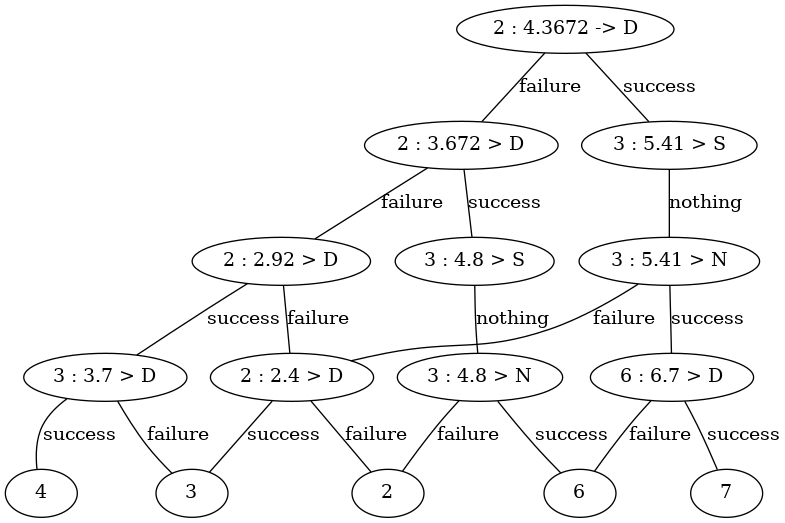

In [159]:
import pydot

graph = pydot.Dot("policy", graph_type="graph")

# list of lists containing possible states for each timestep
s = []

# initial state, value and next action
i0 = (2,0,0)
v0 = V[(4,*i0)]
a0 = A[(4,*i0)]
s.append([(i0, v0, a0)])
graph.add_node(pydot.Node(str((4, i0[0], a0)), label=f"{i0[0]} : {v0:.5g} -> {a0}"))

# only consider states that have a positive probability of actually occuring
for n in range(3,-1,-1):
    states = set()
    # iterate over all states that were reachable in the previous timestep
    for i,_,a in s[-1]:
        for j in I:
            trans = p(a, *i, *j)
            if trans > 0: # only reachable states
                vn = V[(n,*j)] # current value
                an = A[(n,*j)] # optimal next action
                states.add((j, vn, an))

                state_label = (f"{j[0]}" + (f" : {vn:.5g} > {an}" if an != '' else ''))
                graph.add_node(pydot.Node(str((n,j[0],an)), label=state_label))
                
                edge_label = 'nothing' if j[2] else ('success' if j[1] else 'failure')
                graph.add_edge(pydot.Edge(str((n+1,i[0],a)), str((n,j[0],an)), label=edge_label))
    
    s.append(states)

file_name = 'policy.png'
graph.write_png(file_name)
from IPython.display import Image
Image(filename=file_name)

In [152]:
s

[[((2, 0, 0), 4.3671999999999995, 'D')],
 {((2, 0, 0), 3.6719999999999997, 'D'), ((3, 1, 0), 5.409999999999999, 'S')},
 {((2, 0, 0), 2.92, 'D'),
  ((3, 1, 0), 4.799999999999999, 'S'),
  ((3, 1, 1), 5.409999999999999, 'N')},
 {((2, 0, 0), 2.4000000000000004, 'D'),
  ((3, 1, 0), 3.6999999999999997, 'D'),
  ((3, 1, 1), 4.799999999999999, 'N'),
  ((6, 1, 0), 6.699999999999999, 'D')},
 {((2, 0, 0), 2.0, ''),
  ((3, 0, 0), 3.0, ''),
  ((3, 1, 0), 3.0, ''),
  ((4, 1, 0), 4.0, ''),
  ((6, 0, 0), 6.0, ''),
  ((6, 1, 0), 6.0, ''),
  ((7, 1, 0), 7.0, '')}]